# Case Study : How Can a Wellness Technology Company Play It Smart?

## Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

# Problem
Bellabeat company, needs to understand how consumers use non-Bellabeat fitness trackers to identify trends that can:

* Reveal opportunities to improve Bellabeat’s products (e.g., Leaf, Time, or Spring).

* Guide data-driven marketing strategies to attract new customers and retain existing ones.

# Business Task
Analyze Fitbit user data (daily activity and sleep patterns) to:

 - Identify trends in physical activity (Calories burned, intensity) and sleep quality.

 - Correlate activity levels with sleep metrics to uncover behavioral insights.

Provide actionable recommendations for Bellabeat’s marketing strategy, focusing on:

1. **Product Enhancement:** Adjust features of a selected Bellabeat product (e.g., Leaf tracker) based on usage gaps.

2. **Targeted Campaigns:** Highlight underutilized health metrics (e.g., sleep improvement, sedentary alerts) in ads.

In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "fitbit"

# Loading necessary library

In [3]:
library(tidyverse)

# Load CSV file

* Create a dataframe named 'daily_activity' and read in one of the CSV files from the dataset.
* Remember, we can name our dataframe something different, and we can also save our CSV file under a different name as well.


In [4]:
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")

In [5]:
# Create another dataframe for the sleep data.
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

# Explore a few key tables

In [6]:
# Take a look at the daily_activity data.
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


In [7]:
# Identify all the columns in the daily_activity data.
colnames(daily_activity)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [8]:
# Take a look at the sleep_day data.
head(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [9]:
# Identify all the columns in the daily_activity data.
colnames(sleep_day)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

Note that both datasets have the 'Id' field, this can be used to merge the datasets

## Understanding some summary statistics 

In [10]:
# How many unique participants are there in each dataframe?
# It looks like there may be more participants in the daily activity dataset
# than the sleep dataset.
n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)

[1] 35

[1] 24

In [11]:
# How many observations are there in each dataframe?
nrow(daily_activity)
nrow(sleep_day)

[1] 457

[1] 413

What are some quick summary statistics we'd want to know about each data frame?

In [12]:
# For the daily activity dataframe:
daily_activity %>%
select(TotalSteps,
TotalDistance,
SedentaryMinutes) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :  32.0  
 1st Qu.: 1988   1st Qu.: 1.410   1st Qu.: 728.0  
 Median : 5986   Median : 4.090   Median :1057.0  
 Mean   : 6547   Mean   : 4.664   Mean   : 995.3  
 3rd Qu.:10198   3rd Qu.: 7.160   3rd Qu.:1285.0  
 Max.   :28497   Max.   :27.530   Max.   :1440.0  

In [13]:
# For the sleep dataframe:
sleep_day %>%
select(TotalSleepRecords,
TotalMinutesAsleep,
TotalTimeInBed) %>%
summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

What does this tell us about how this sample of people's activities?

## Plotting a few explorations
- What's the relationship between steps taken in a day and sedentary minutes?
- How could this help inform the customer segments that we can market to?
- E.g. position this more as a way to get started in walking more?
- Or to measure steps that you're already taking?

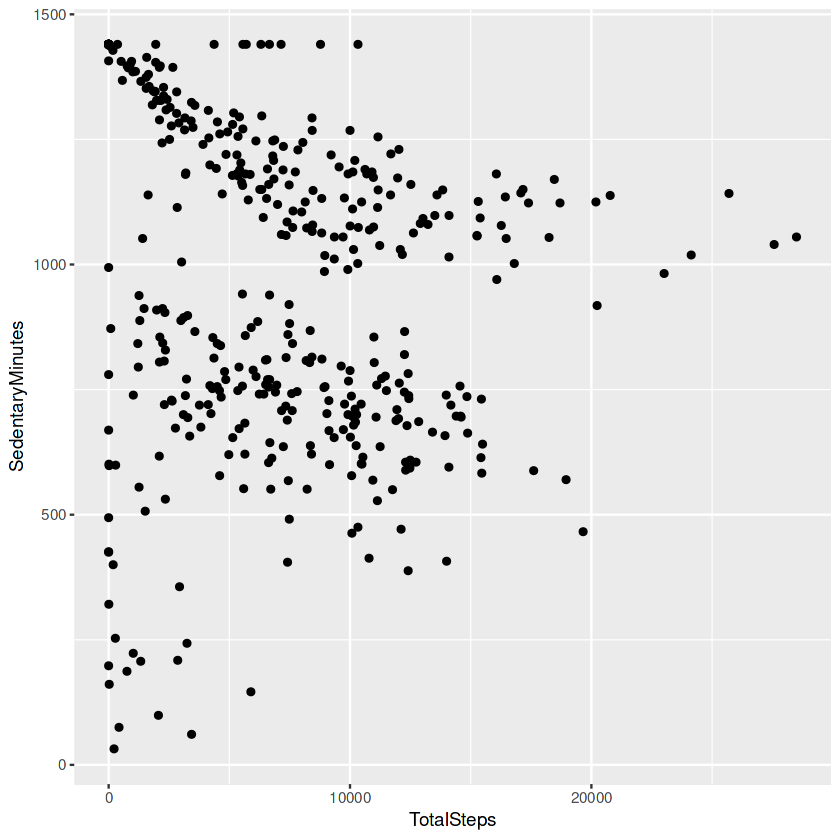

In [14]:
ggplot(data=daily_activity, aes(x=TotalSteps, y=SedentaryMinutes)) + geom_point()

What's the relationship between minutes asleep and time in bed?
You might expect it to be almost completely linear - are there any unexpected trends?

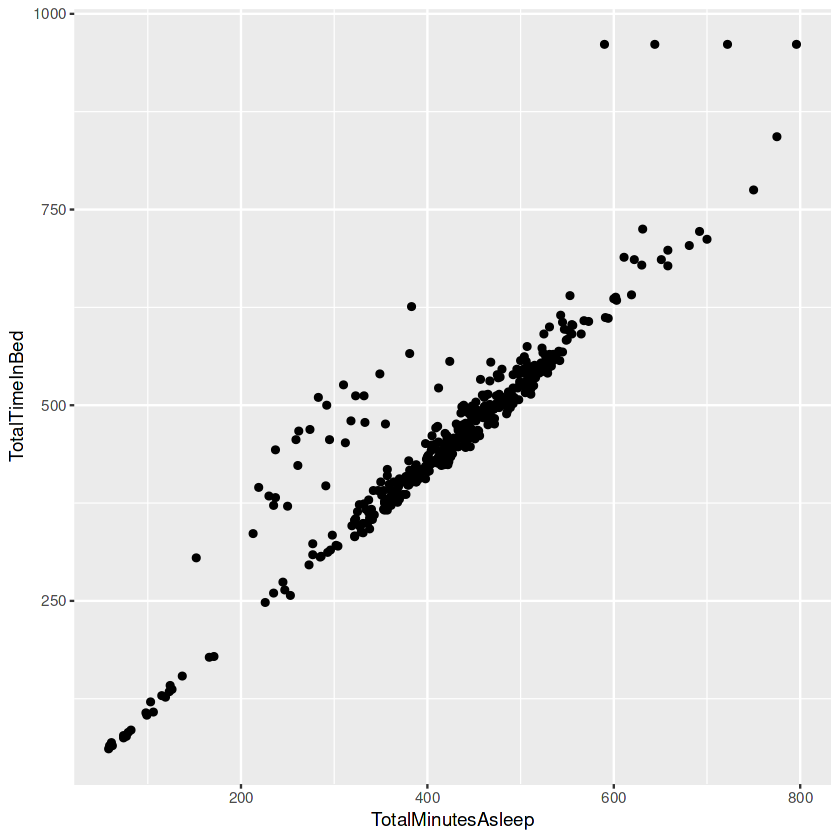

In [15]:
ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point()

What could these trends tell us about how to help market this product? Or areas where we
might want to explore further?

## Merging these two datasets together

In [16]:
# Convert date columns to Date type
daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)
sleep_day$SleepDay <- mdy_hms(sleep_day$SleepDay)

In [17]:
# Ensure date columns match in format (remove time from SleepDay)
sleep_day <- sleep_day %>%
  mutate(ActivityDate = as.Date(SleepDay))

In [18]:
combined_data <- merge(sleep_day, daily_activity, by="Id")

# Take a look at how many participants are in this data set.
n_distinct(combined_data$Id)

[1] 24

In [19]:
# Note that there were more participant Ids in the daily activity
# dataset that have been filtered out using merge. Consider using 'outer_join'
# to keep those in the dataset.
# Now we can explore some different relationships between activity and sleep as well.
# For example, participants who sleep more also take more steps or fewer
# steps per day? Is there a relationship at all? 

In [20]:
# Join datasets using full outer join
merge_data <- merge(daily_activity, sleep_day, by = c("Id", "ActivityDate"), all = TRUE)

In [21]:
# Take a look at the number of unique participants in the merged dataset
n_distinct(merge_data$Id)
str(merge_data)
# Now it has all unique ID's

[1] 35

'data.frame':	858 obs. of  19 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Date, format: "2016-03-25" "2016-03-26" ...
 $ TotalSteps              : int  11004 17609 12736 13231 12041 10970 12256 12262 11248 10016 ...
 $ TotalDistance           : num  7.11 11.55 8.53 8.93 7.85 ...
 $ TrackerDistance         : num  7.11 11.55 8.53 8.93 7.85 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  2.57 6.92 4.66 3.19 2.16 ...
 $ ModeratelyActiveDistance: num  0.46 0.73 0.16 0.79 1.09 ...
 $ LightActiveDistance     : num  4.07 3.91 3.71 4.95 4.61 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  33 89 56 39 28 30 33 47 40 15 ...
 $ FairlyActiveMinutes     : int  12 17 5 20 28 13 12 21 11 30 ...
 $ LightlyActiveMinutes    : int  205 274 268 224 243 223 239 200 244 314 ...
 $ SedentaryMinutes        : int  804 588 605 1080 763 1174 820 

In [22]:
# Extract important features for analysis
merge_data <- merge_data %>%
  select(Id, ActivityDate, TotalSteps, TotalDistance, SedentaryMinutes,
         TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed,
         VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes,
         Calories)

## Visualizing correlation among the features

In [23]:
library(ggcorrplot)
# Calculate correlation matrix
cor_matrix <- cor(merge_data %>% select(-Id, -ActivityDate), use = "complete.obs")
cor_matrix

,TotalSteps,TotalDistance,SedentaryMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories
TotalSteps,1.0000000,0.9956629,-0.30211903,-0.2711255,-0.3412517,-0.425049160,0.7677581,0.8378209,0.7290867,0.487396725
TotalDistance,0.9956629,1.0000000,-0.29580899,-0.2718123,-0.3634662,-0.445631016,0.8201460,0.8731265,0.7297920,0.541943288
SedentaryMinutes,-0.3021190,-0.2958090,1.00000000,-0.1366109,-0.0173838,-0.072290978,-0.1472977,-0.2290805,-0.3861355,-0.307727647
TotalSleepRecords,-0.2711255,-0.2718123,-0.13661091,1.0000000,0.7114335,0.718287941,-0.1968121,-0.2354657,-0.2834856,0.202793034
TotalMinutesAsleep,-0.3412517,-0.3634662,-0.01738380,0.7114335,1.0000000,0.913416621,-0.3549332,-0.3158180,-0.2421448,0.123807192
TotalTimeInBed,-0.4250492,-0.4456310,-0.07229098,0.7182879,0.9134166,1.000000000,-0.4698798,-0.4396800,-0.2878261,0.005025223
VeryActiveMinutes,0.7677581,0.8201460,-0.14729768,-0.1968121,-0.3549332,-0.469879799,1.0000000,0.8640276,0.5416625,0.784294799
FairlyActiveMinutes,0.8378209,0.8731265,-0.22908052,-0.2354657,-0.3158180,-0.439680024,0.8640276,1.0000000,0.6575372,0.699045168
LightlyActiveMinutes,0.7290867,0.7297920,-0.38613551,-0.2834856,-0.2421448,-0.287826063,0.5416625,0.6575372,1.0000000,0.476207947
Calories,0.4873967,0.5419433,-0.30772765,0.2027930,0.1238072,0.005025223,0.7842948,0.6990452,0.4762079,1.000000000


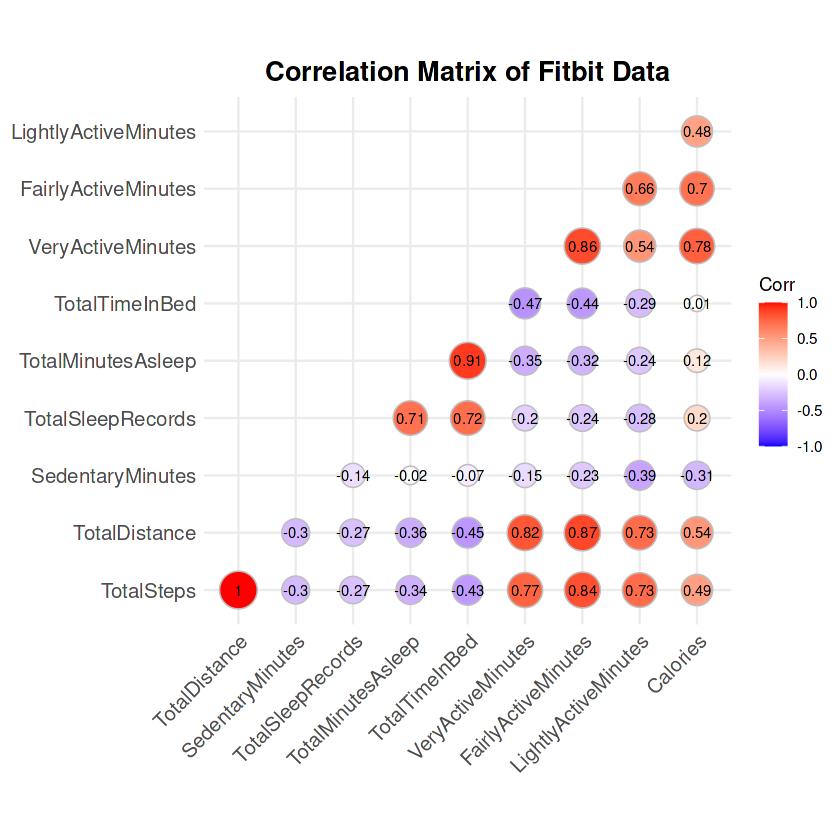

In [49]:
# Plot the correlation matrix
ggcorrplot(cor_matrix, 
           method = "circle", 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           title = "Correlation Matrix of Fitbit Data",
           ggtheme = theme_minimal(),
           colors = c("blue", "white", "red")) +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold")) 

The strongest positive correlations exist between expected pairs, such as **TotalSteps and TotalDistance (0.996)**, confirming that step count directly relates to distance covered, and **TotalMinutesAsleep and TotalTimeInBed (0.913)**, indicating most time in bed is spent sleeping. Activity levels also show meaningful connections, with **VeryActiveMinutes strongly linked to calorie burn (0.784)** and **FairlyActiveMinutes closely tied to TotalSteps (0.838)**. Interestingly, negative correlations suggest trade-offs, such as **more steps correlating with slightly less sleep (-0.341)** and **higher-intensity activity associating with less time in bed (-0.470)**. Meanwhile, **sedentary behavior shows little direct impact on sleep duration (-0.017)**, implying other factors influence sleep more significantly. These findings highlight patterns worth exploring further, such as whether active individuals sacrifice sleep for exercise or if certain activity types optimize both fitness and rest.

In [25]:
# Now calculate the total minute for all activity
merge_data <- merge_data %>%
  mutate(TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

In [26]:
## Now extract day of the week and month from ActivityDate to understand the seasonal and weekly patterns
merge_data <- merge_data %>%
  mutate(Days = weekdays(ActivityDate),
         Months = format(ActivityDate, "%B"))
str(merge_data)

'data.frame':	858 obs. of  15 variables:
 $ Id                  : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate        : Date, format: "2016-03-25" "2016-03-26" ...
 $ TotalSteps          : int  11004 17609 12736 13231 12041 10970 12256 12262 11248 10016 ...
 $ TotalDistance       : num  7.11 11.55 8.53 8.93 7.85 ...
 $ SedentaryMinutes    : int  804 588 605 1080 763 1174 820 866 636 655 ...
 $ TotalSleepRecords   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ TotalMinutesAsleep  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ TotalTimeInBed      : int  NA NA NA NA NA NA NA NA NA NA ...
 $ VeryActiveMinutes   : int  33 89 56 39 28 30 33 47 40 15 ...
 $ FairlyActiveMinutes : int  12 17 5 20 28 13 12 21 11 30 ...
 $ LightlyActiveMinutes: int  205 274 268 224 243 223 239 200 244 314 ...
 $ Calories            : int  1819 2154 1944 1932 1886 1820 1889 1868 1843 1850 ...
 $ TotalActiveMinutes  : int  250 380 329 283 299 266 284 268 295 359 ...
 $ Days                : chr  "Frid

The correlation matrix revealed strong positive relationships between both vigorous activity (VeryActiveMinutes) and moderate activity (FairlyActiveMinutes) with calories burned. To better understand how these different activity intensities contribute to energy expenditure, we will create a visualization that compares their individual impacts.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 401 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 401 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 401 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 401 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 401 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 401 rows containing missing values or values outside the scale range
(`geom_line()`).”


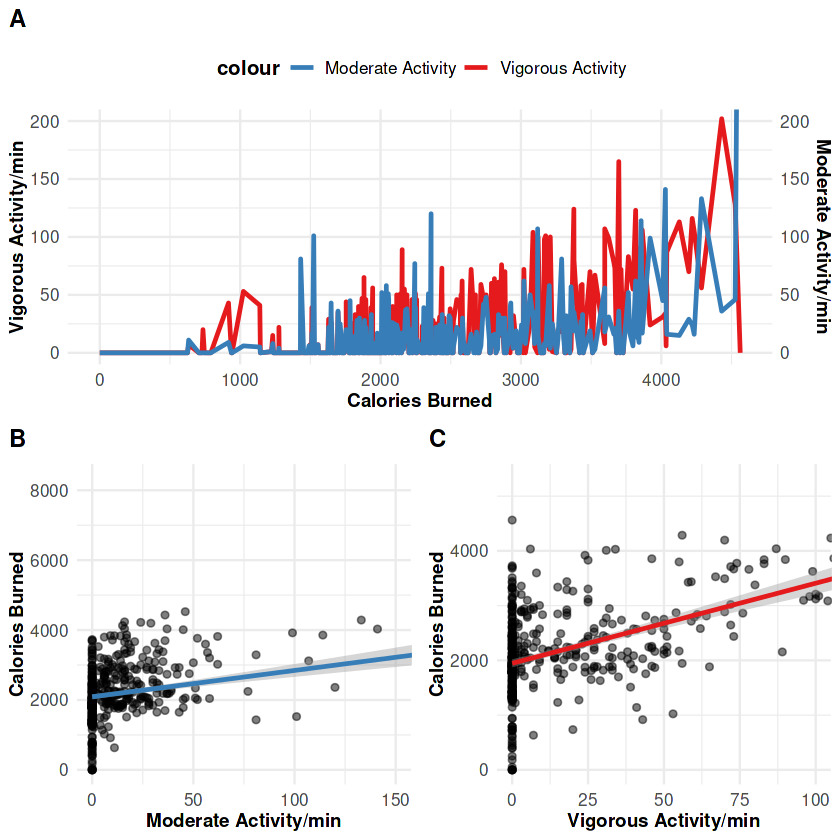

In [51]:
com <- ggplot(merge_data, aes(x = Calories)) +
    geom_line(aes(y = VeryActiveMinutes, color = "Vigorous Activity"), size = 1) +
    geom_line(aes(y = FairlyActiveMinutes, color = "Moderate Activity"), size = 1) + # Scale customers to match sales range
    scale_y_continuous(
      name = "Vigorous Activity/min",
      sec.axis = sec_axis(~., name = "Moderate Activity/min") # Reverse the scaling
    ) +
    scale_color_manual(values = c("Vigorous Activity" = "#E41A1C", "Moderate Activity" = "#377EB8")) +
    labs(title = "",
         x = "Calories Burned") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(size = 10),
      axis.text.y = element_text(size = 10),
      axis.title.x = element_text(size = 11, face = "bold"),
      axis.title.y = element_text(size = 11, face = "bold"),
      legend.text = element_text(size=10),
      legend.title = element_text(size=12,face = "bold"),
      legend.position = "top",
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    ) +
coord_cartesian(ylim = c(0,200))

# Create a plot for VeryActiveMinutes vs Calories
ind1 <- ggplot(merge_data, aes(x = VeryActiveMinutes, y = Calories)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "#E41A1C") +
  labs(title = "",
       x = "Vigorous Activity/min",
       y = "Calories Burned") +
  theme_minimal() +
theme(
      axis.text.x = element_text(size = 10),
      axis.text.y = element_text(size = 10),
      axis.title.x = element_text(size = 11, face = "bold"),
      axis.title.y = element_text(size = 11, face = "bold"),
      legend.text = element_text(size=10),
      legend.title = element_text(size=12,face = "bold"),
      legend.position = "top",
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    ) +
coord_cartesian(xlim = c(0,100))

# Higher-intensity activity burns more calories, which is expected.

# Create ggplot for TotalactiveMinutes vs Calories
ind2 <- ggplot(merge_data, aes(x = FairlyActiveMinutes, y = Calories)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "#377EB8") +
  labs(title = "",
       x = "Moderate Activity/min",
       y = "Calories Burned") +
  theme_minimal() +
theme(
      axis.text.x = element_text(size = 10),
      axis.text.y = element_text(size = 10),
      axis.title.x = element_text(size = 11, face = "bold"),
      axis.title.y = element_text(size = 11, face = "bold"),
      legend.text = element_text(size=10),
      legend.title = element_text(size=12,face = "bold"),
      legend.position = "top",
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    ) +
coord_cartesian(xlim = c(0,150))

library(ggpubr)
ggarrange(com,                                                 
          ggarrange(ind2, ind1, ncol = 2, labels = c("B", "C")), 
          nrow = 2, 
          labels = "A"                                        
          ) 

Above visualization and correlation reveals a significant positive relationship between physical activity intensity and calorie expenditure, with both vigorous and moderate activity contributing to increased energy burn. Vigorous activity demonstrates a stronger correlation (r = 0.78) with calorie expenditure compared to moderate activity (r = 0.70), confirming its greater metabolic impact per unit of time. These findings align with physiological expectations, as high-intensity exercise typically demands more energy. While both activity types effectively promote calorie burning, the results suggest that vigorous activity offers more efficient energy expenditure for individuals with limited time. This evidence supports exercise recommendations that emphasize higher-intensity workouts for maximizing caloric burn, while still validating moderate activity as an effective alternative for those preferring less intense regimens.



## How daily activity affect sleep?

In [52]:
# Extract important features for analysis from merge_data
sleep_activity_data <- merge_data %>%
  select(Id, ActivityDate, TotalMinutesAsleep, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, 
         SedentaryMinutes, Days, Months)
str(sleep_activity_data)  

'data.frame':	858 obs. of  9 variables:
 $ Id                  : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate        : Date, format: "2016-03-25" "2016-03-26" ...
 $ TotalMinutesAsleep  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ VeryActiveMinutes   : int  33 89 56 39 28 30 33 47 40 15 ...
 $ FairlyActiveMinutes : int  12 17 5 20 28 13 12 21 11 30 ...
 $ LightlyActiveMinutes: int  205 274 268 224 243 223 239 200 244 314 ...
 $ SedentaryMinutes    : int  804 588 605 1080 763 1174 820 866 636 655 ...
 $ Days                : chr  "Friday" "Saturday" "Sunday" "Monday" ...
 $ Months              : chr  "March" "March" "March" "March" ...


In [54]:
# Now create long format data for visualization
sleep_activity_long <- sleep_activity_data %>%
  pivot_longer(cols = c(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes),
               names_to = "ActivityType",
               values_to = "Total Activity (min)")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3384 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 3384 rows containing missing values or values outside the scale range
(`geom_point()`).”


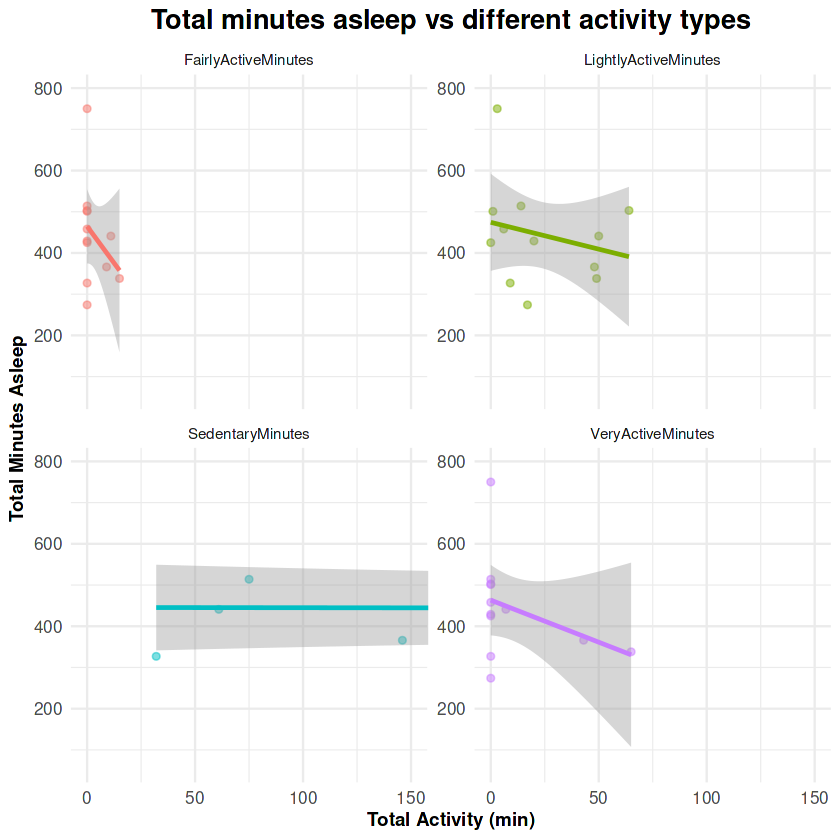

In [61]:
# Now visualize the relationship between TotalMinutesAsleep and different activity types
ggplot(sleep_activity_long, aes(x = `Total Activity (min)`, y = TotalMinutesAsleep, color = ActivityType)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm") +
  labs(title = "Total minutes asleep vs different activity types",
       x = "Total Activity (min)",
       y = "Total Minutes Asleep") +
  theme_minimal() +
  facet_wrap(~ActivityType, scales = "free_y") +
theme(
      axis.text.x = element_text(size = 10),
      axis.text.y = element_text(size = 10),
      axis.title.x = element_text(size = 11, face = "bold"),
      axis.title.y = element_text(size = 11, face = "bold"),
      legend.text = element_text(size=10),
      legend.title = element_text(size=12,face = "bold"),
      legend.position = "none",
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    ) +
coord_cartesian(xlim = c(0,150))
  

The analysis of both the correlation matrix and visualizations reveals a consistent inverse relationship between physical activity levels (vigorous, moderate, and light) and total sleep duration. This finding suggests that individuals who engage in more physical activity, regardless of intensity tend to experience reduced sleep time.

Several physiological and behavioral factors may explain these results:

1. **Time displacement effect:** Increased activity, particularly in evening hours, may directly reduce available time for sleep as individuals allocate more time to exercise.

2. **Elevated physiological arousal:** Physical activity stimulates sympathetic nervous system activity and raises core body temperature, potentially delaying sleep onset when performed close to bedtime.

3. **Hormonal responses:** Exercise-induced changes in cortisol, adrenaline, and endorphin levels may interfere with natural sleep-wake cycles.

4. **Measurement considerations:** The data may reflect individuals who prioritize daytime activity over sleep, rather than a direct causal relationship.

5. **Potential confounding variables:** Factors like work schedules, stress levels, or caffeine consumption that correlate with both activity patterns and sleep duration may influence these results.

These findings highlight the complex interplay between physical activity and sleep regulation, suggesting that while exercise offers numerous health benefits, its timing and intensity may need optimization to prevent sleep duration reduction. 

## Which day of the week people are more active?


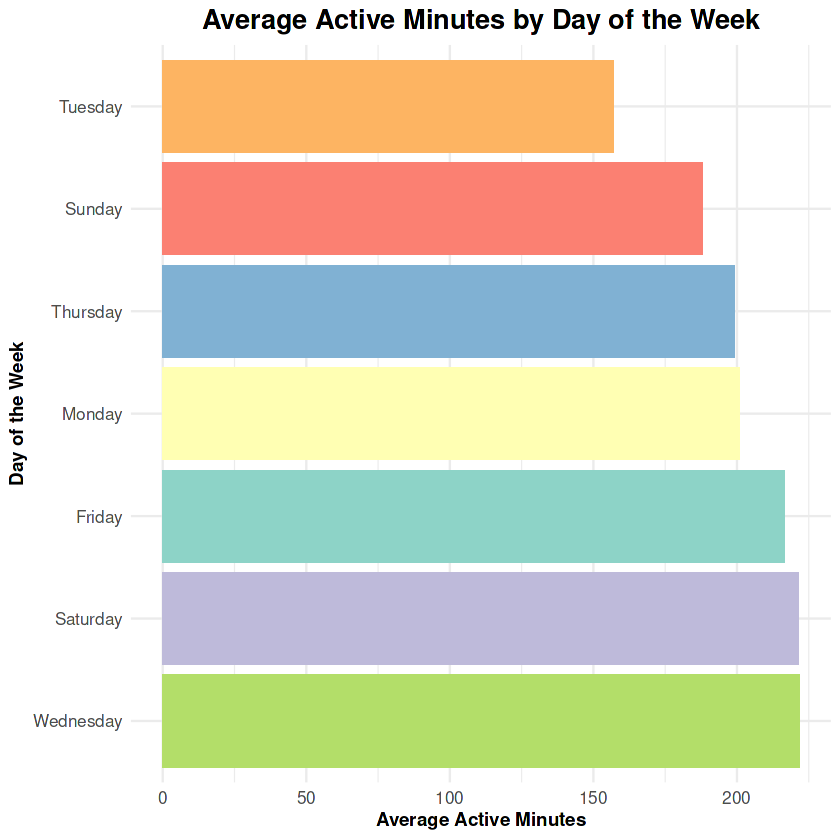

In [70]:
merge_data %>%
  group_by(Days) %>%
  summarise(avg_active_minutes = mean(TotalActiveMinutes, na.rm = TRUE)) %>%
  ggplot(aes(x = reorder(Days, -avg_active_minutes), y = avg_active_minutes, fill = Days)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Active Minutes by Day of the Week",
       x = "Day of the Week",
       y = "Average Active Minutes") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(
      axis.text.x = element_text(size = 10),
      axis.text.y = element_text(size = 10),
      axis.title.x = element_text(size = 11, face = "bold"),
      axis.title.y = element_text(size = 11, face = "bold"),
      legend.text = element_text(size=10),
      legend.title = element_text(size=12,face = "bold"),
      legend.position = "none",
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")) +
  coord_flip()

The bar chart reveals that smart device users exhibit higher activity levels on Fridays, Saturdays, and Wednesdays compared to other weekdays. This trend suggests distinct behavioral patterns tied to weekly routines.

**Possible Explanations:**
1. **Weekend Effect (Friday & Saturday)**

   - Social & Leisure Activities: Increased social engagements, workouts, or outdoor activities on weekends.

   - Work-Life Balance: Reduced work-related sedentary behavior compared to weekdays.

2. **Midweek Surge (Wednesday)**

   - Fitness Routine Consistency: Many structured workout plans (e.g., gym schedules) peak midweek.

   - Motivation Rebound: A midweek energy boost after overcoming Monday-Tuesday fatigue.

3. **Lower Activity on Other Weekdays**

   - Work/School Commitments: Sedentary desk jobs or academic schedules may limit movement.

   - Recovery Days: Active individuals may rest on Sundays/Mondays to balance intense weekend workouts.

In [84]:
# Now create long format data for visualization
sleep_activity_long2 <- sleep_activity_data %>%
  pivot_longer(cols = c(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes),
               names_to = "ActivityType",
               values_to = "Total_Activity_min")
library(tidyverse)
sleep_activity_long2$Days <- factor(sleep_activity_long2$Days, c("Saturday", "Sunday","Monday", "Tuesday", "Wednesday", "Thursday","Friday"))

Warning message:
“Removed 1203 rows containing missing values or values outside the scale range
(`geom_col()`).”


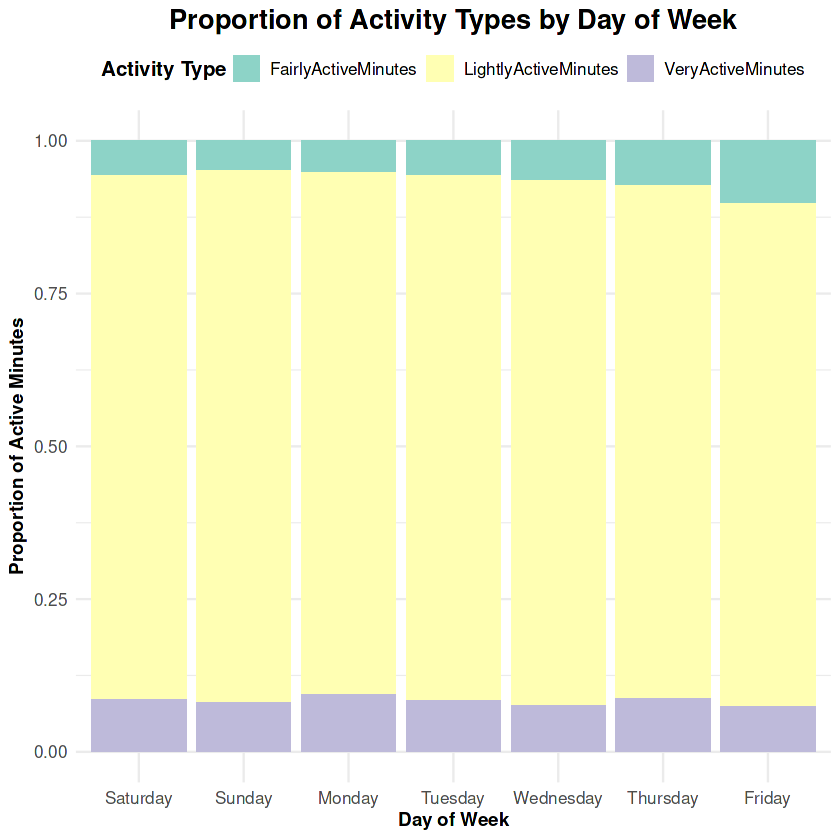

In [87]:
ggplot(sleep_activity_long2, 
       aes(x = Days, 
           y = Total_Activity_min, 
           fill = ActivityType)) +
  geom_col(position = "fill") +  # Using geom_col() instead of geom_bar(stat = "identity")
  labs(title = "Proportion of Activity Types by Day of Week",
       x = "Day of Week",
       y = "Proportion of Active Minutes",
       fill = "Activity Type") +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title.x = element_text(size = 11, face = "bold"),
    axis.title.y = element_text(size = 11, face = "bold"),
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    legend.text = element_text(size = 10),
    legend.title = element_text(size = 12, face = "bold"),
    legend.position = "top"
  )

The visualization reveals distinct trends in activity levels throughout the week:

1. **Light Activity Dominance:**

   - Light physical activity consistently accounts for the majority of movement throughout the entire week

   - Particularly prominent from Saturday through Monday, representing more than 75% of total activity minutes

2. **Vigorous Activity Peaks:**

   - Shows notable spikes on Mondays and Thursdays

   - Comprises more than 13% of total activity on these peak days compared to 10% on other days

3. **Moderate Activity Trends:**

   - Reaches its highest levels on Thursdays and Fridays

   - Accounts for around 14% of activity during these peak periods

**Potential Explanations:**

1. **Workweek Structure Impact:**

   - Light activity dominance suggests most movement comes from daily living (walking, chores) rather than intentional exercise

   - Thursday/Friday moderate activity may reflect pre-weekend workout routines

   - Monday vigorous activity could represent renewed fitness motivation after the weekend

2. **Behavioral Patterns:**

   - Weekend light activity (Sat-Mon) aligns with more leisure time but less structured exercise

   - Midweek intensity peaks may correlate with established gym schedules or fitness classes

   - The "weekend recovery effect" leads to reduced intense activity Saturday through Monday

3. **Physiological Factors:**

   - Cumulative fatigue through the week may explain why vigorous activity doesn't maintain peak levels daily

   - Moderate activity increase toward week's end may represent a balance between energy and motivation